Classification of Penguin Species for Gender Prediction 


In [ ]:
# Importing the libraries


In [ ]:
!pip install joypy
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import joypy as jp
from __future__ import division
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_csv("penguins_lter.csv")
df1 = pd.read_csv("penguins_size.csv")

In [ ]:
# EDA 


In [ ]:
df.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [ ]:
df.tail()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN
343,PAL0910,124,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A2,Yes,11/22/09,49.9,16.1,213.0,5400.0,MALE,8.36390,-26.15531,NaN


In [ ]:
df.shape

(344, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [ ]:
df.describe(include='all')

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
count,344,344.000000,344,344,344,344,344,344,344,342.000000,342.000000,342.000000,342.000000,334,330.000000,331.000000,26
unique,3,NaN,3,1,3,1,190,2,50,NaN,NaN,NaN,NaN,3,NaN,NaN,7
top,PAL0910,NaN,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N61A2,Yes,11/27/07,NaN,NaN,NaN,NaN,MALE,NaN,NaN,Nest never observed with full clutch.
freq,120,NaN,152,344,168,344,3,308,18,NaN,NaN,NaN,NaN,168,NaN,NaN,13
mean,NaN,63.151163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN,8.733382,-25.686292,NaN
std,NaN,40.430199,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN,0.551770,0.793961,NaN
min,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,7.632200,-27.018540,NaN
25%,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN,8.299890,-26.320305,NaN
50%,NaN,58.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN,8.652405,-25.833520,NaN
75%,NaN,95.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN,9.172123,-25.062050,NaN


In [ ]:
df1.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [ ]:
df1.tail()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE
343,Gentoo,Biscoe,49.9,16.1,213.0,5400.0,MALE


In [ ]:
df1.shape

(344, 7)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [ ]:
df1.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


Inference - Missing values are noticed under the features 


In [ ]:
# Filling the missing values

In [ ]:
df.isnull().sum()


studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [ ]:
df1.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [ ]:
df1.drop(df1[df1['body_mass_g'].isnull()].index,axis=0, inplace=True)
df1

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
df1['sex'] = df1['sex'].fillna('MALE')
df1

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
df1.drop(df1[df1['sex']=='.'].index, inplace=True)
df1

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
# Covariance 

In [ ]:
df1.cov()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,29.893736,-2.539213,50.496502,2612.107405
culmen_depth_mm,-2.539213,3.905066,-16.191782,-746.686303
flipper_length_mm,50.496502,-16.191782,197.550181,9821.367949
body_mass_g,2612.107405,-746.686303,9821.367949,643685.613248


In [ ]:
# Correlation 


In [ ]:
df1.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235015,0.657102,0.595476
culmen_depth_mm,-0.235015,1.000000,-0.582964,-0.470963
flipper_length_mm,0.657102,-0.582964,1.000000,0.870956
body_mass_g,0.595476,-0.470963,0.870956,1.000000


Common Species Known


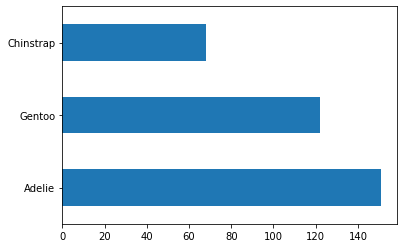

In [ ]:
print('Common Species Known')
df1['species'].value_counts().plot(kind='barh')
plt.show()

Distribution of the variables - Adelie species is the most common species known in Penguin followed by Gentoo and Chinstrap


Culmen Length Distribution


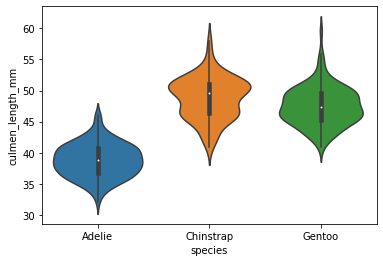

In [ ]:
print('Culmen Length Distribution')
sns.violinplot(x ="species",y ="culmen_length_mm",data = df1)
plt.show()

Inference - Chinstrap has the highest Culmen Length followed by the Gentoo and Adelie species


Culmen Depth Distribution


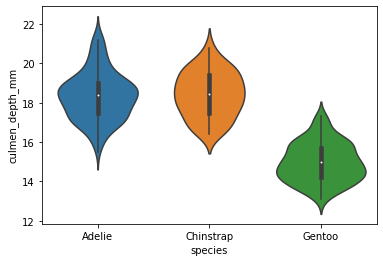

In [ ]:
print('Culmen Depth Distribution')
sns.violinplot(x ="species",y ="culmen_depth_mm",data = df1)
plt.show()

Inference - Adelie and the Chinstrap Species has the highest Culmen Depth followed by the Gentoo species

Flipper Length Distribution


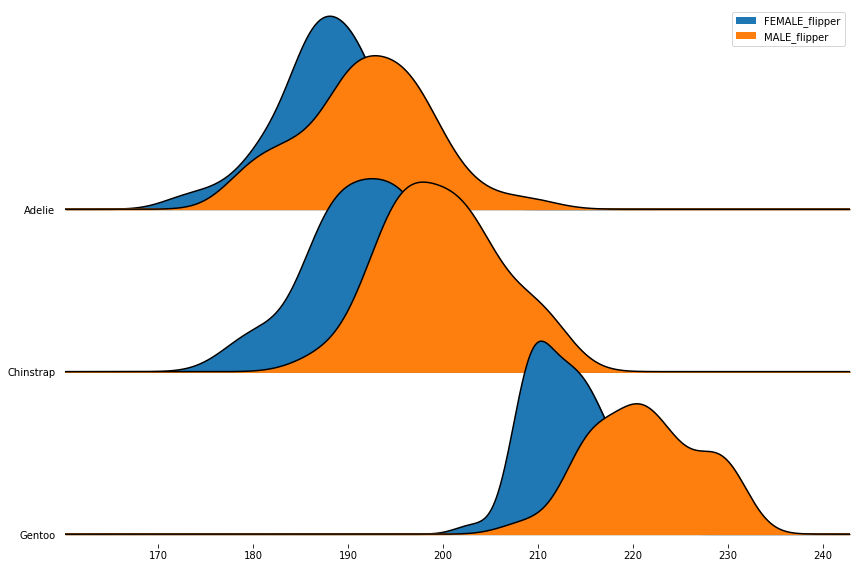

In [ ]:
print('Flipper Length Distribution')
df2 = df1.copy()
df2["MALE_flipper"] = df1.apply(lambda row: row["flipper_length_mm"] if row["sex"] == "MALE" else np.nan, axis = 1)
df2["FEMALE_flipper"] = df1.apply(lambda row: row["flipper_length_mm"] if row["sex"] == "FEMALE" else np.nan, axis = 1)
fig, axes = jp.joyplot(df2, column=['FEMALE_flipper', 'MALE_flipper'],by = "species",ylim = 'own',figsize = (12,8),legend = True)

Inference - In Adelie , the female flipper length is higher than the male . In Chinstrap , both male and female have similar flipper length . In Gentoo , the female flipper length is higher than the male. Overall , Gentoo have the higher flipper length compare to the other two species.


Body Mass Distribution


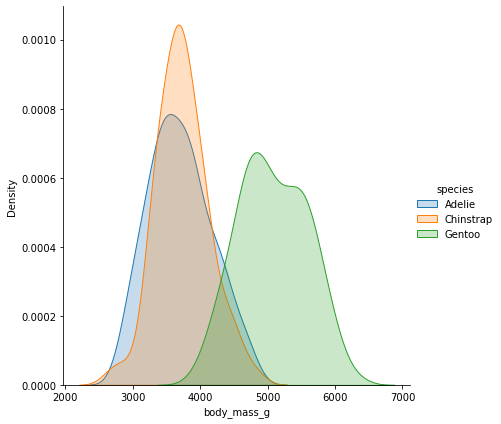

In [ ]:
print('Body Mass Distribution')
sns.FacetGrid(df1, hue="species", height=6,).map(sns.kdeplot, "body_mass_g",shade=True).add_legend()
plt.show()


Inference - Chinstrap have a higher body mass followed by Adelie and Gentoo

## Correlation of the Variables 

culmen_length vs culmen_depth


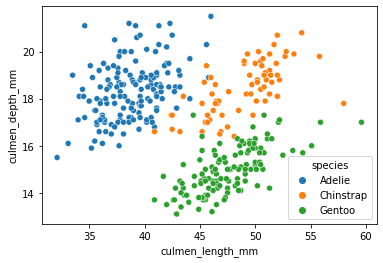

In [ ]:
print('culmen_length vs culmen_depth')
sns.scatterplot(data=df1, x='culmen_length_mm', y='culmen_depth_mm', hue='species')
plt.show()

Inference - The correlation between the culmen length and culmen depth of the Adelie species is higher than the Chinstrap and Gentoo



culmen_length vs flipper_length


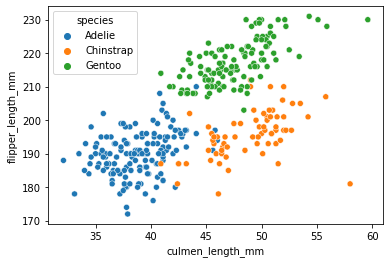

In [ ]:
print('culmen_length vs flipper_length')
sns.scatterplot(data=df1, x='culmen_length_mm', y='flipper_length_mm', hue='species')
plt.show()


Inference - The correlation between the culmen length and the flipper length of the Gentoo species is higher than the Chinstrap and Adelie



culmen_depth vs flipper_length


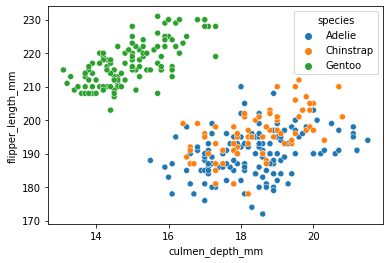

In [ ]:
print('culmen_depth vs flipper_length')
sns.scatterplot(data=df1, x='culmen_depth_mm', y='flipper_length_mm', hue='species')
plt.show()

Inference - The correlation between the culmen depth and the flipper length of the Gentoo species is higher than the Chinstrap and Adelie but these two species have similar correlation.

culmen_depth vs body_mass


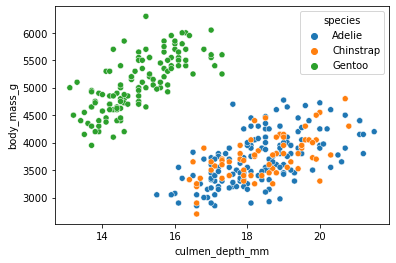

In [ ]:
print('culmen_depth vs body_mass')
sns.scatterplot(data=df1, x='culmen_depth_mm', y='body_mass_g', hue='species')
plt.show()


Inference - The correlation between the culmen depth and the flipper length of the Gentoo species is higher than the Chinstrap and Adelie but these two species have similar correlation.


culmen_length vs body_mass


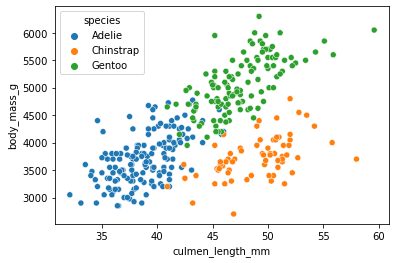

In [ ]:
print('culmen_length vs body_mass')
sns.scatterplot(data=df1, x='culmen_length_mm', y='body_mass_g', hue='species')
plt.show()


Inference - The correlation between the culmen depth and the flipper length of the Gentoo species is higher than the Chinstrap and Adelie.

flipper_length vs body_mass


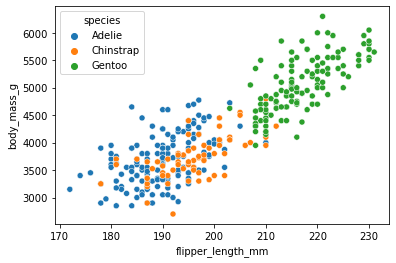

In [ ]:
print('flipper_length vs body_mass')
sns.scatterplot(data=df1 ,x='flipper_length_mm', y='body_mass_g', hue='species')
plt.show()


nference - The correlation between the culmen depth and the flipper length of the Gentoo species is higher than the Chinstrap and Adelie but these two species have similar correlation.


Pairplot


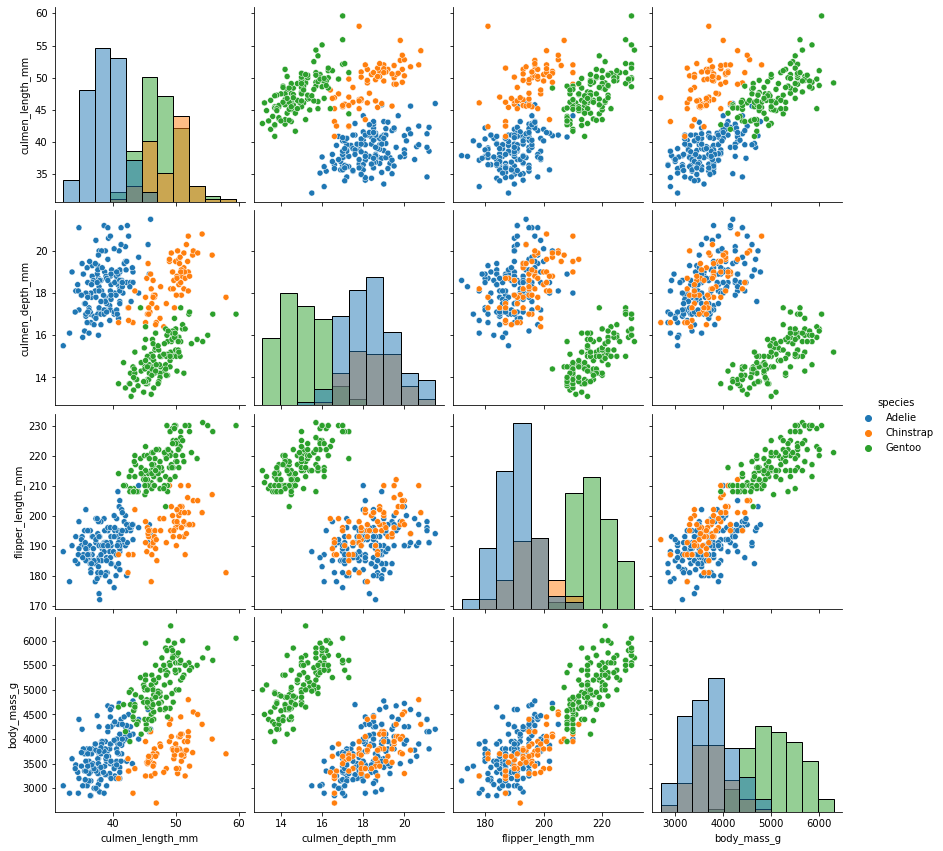

In [ ]:
print('Pairplot')
sns.pairplot(data=df1[['species','culmen_length_mm','culmen_depth_mm','flipper_length_mm', 'body_mass_g']], hue="species", height=3, diag_kind="hist")
plt.show()


Inference - Comparing the bar and the scatter plot , the pairplot helps us to decide the best set of attribute of the dataset.


## Extreme Values of the Variables


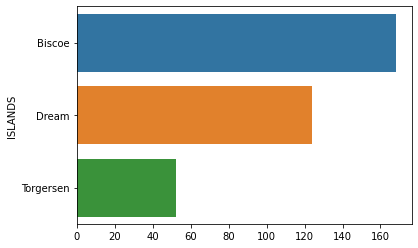

In [ ]:
df3 = df['Island'].value_counts().reset_index()
fig = sns.barplot(data=df3, x='Island', y='index')
fig.set(xlabel='', ylabel='ISLANDS')
plt.show()

Inference- Biscoe consists of most Penguins


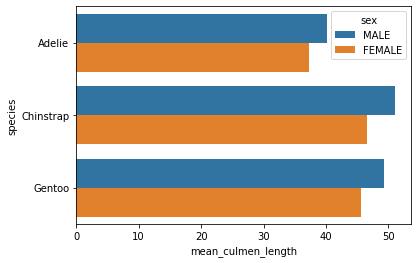

In [ ]:
df4= df1.loc[:,['species','culmen_length_mm','sex']]
df4['mean_culmen_length'] = df4.groupby(['species','sex'])['culmen_length_mm'].transform('mean')
df4 = df4.drop('culmen_length_mm', axis=1).drop_duplicates()
sns.barplot(data=df4, x='mean_culmen_length', y='species', hue='sex')
plt.show()

Inference- Chinstrap species have highest Culmen Length

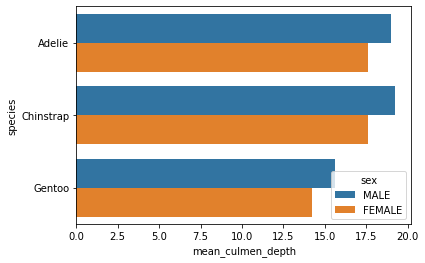

In [ ]:
df5 = df1.loc[:,['species','culmen_depth_mm','sex']]
df5['mean_culmen_depth'] = df5.groupby(['species','sex'])['culmen_depth_mm'].transform('mean')
df5 = df5.drop('culmen_depth_mm', axis=1).drop_duplicates()
sns.barplot(data=df5, x='mean_culmen_depth', y='species', hue='sex')
plt.show()

Inference- Chinstrap have the highest Culmen Depth

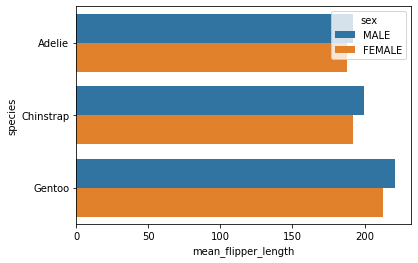

In [ ]:
df6= df1.loc[:,['species','flipper_length_mm','sex']]
df6['mean_flipper_length'] = df6.groupby(['species','sex'])['flipper_length_mm'].transform('mean')
df6= df6.drop('flipper_length_mm', axis=1).drop_duplicates()
sns.barplot(data=df6, x='mean_flipper_length', y='species', hue='sex')
plt.show()

Inference - Gentoo have the highest flipper length 

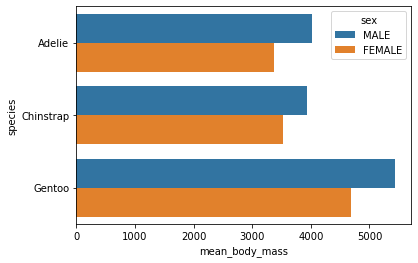

In [ ]:
df7 = df1.loc[:,['species','body_mass_g','sex']]
df7['mean_body_mass'] = df7.groupby(['species','sex'])['body_mass_g'].transform('mean')
df7 = df7.drop('body_mass_g', axis=1).drop_duplicates()
sns.barplot(data=df7, x='mean_body_mass', y='species', hue='sex')
plt.show()

In [ ]:
# Inference - Gentoo have the highest mean body mass

## Creating classifier for gender prediction

In [ ]:
df8 = df1.copy()
target = 'sex'
encode = ['species','island']

for col in encode:
    dummy = pd.get_dummies(df8[col], prefix=col)
    df = pd.concat([df,dummy], axis=1)
    del df8[col]

In [ ]:
target_mapper = {'MALE':0, 'FEMALE':1}
def target_encode(val):
    return target_mapper[val]

df8['sex'] = df8['sex'].apply(target_encode)

In [ ]:
X = df8.drop('sex', axis=1)
y = df8['sex']

In [ ]:
from sklearn import preprocessing
X = preprocessing.scale(X)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2, random_state=13)

In [ ]:
# Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg
reg.fit(X_train, Y_train)
y_pred = reg.predict(X_test)
y_pred
cm= confusion_matrix(Y_test, y_pred)
cm
print('CLASSIFICATION REPORT\n')
print(classification_report(Y_test,y_pred))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      0.78      0.88        36
           1       0.80      1.00      0.89        33

    accuracy                           0.88        69
   macro avg       0.90      0.89      0.88        69
weighted avg       0.91      0.88      0.88        69



In [ ]:
# Decision Tree Classifer

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
y_pred = dtc.predict(X_test)
cm= confusion_matrix(Y_test, y_pred)
cm
print('CLASSIFICATION REPORT\n')
print(classification_report(Y_test,y_pred))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.82      0.64      0.72        36
           1       0.68      0.85      0.76        33

    accuracy                           0.74        69
   macro avg       0.75      0.74      0.74        69
weighted avg       0.76      0.74      0.74        69



In [ ]:
# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
y_pred = rfc.predict(X_test)
cm= confusion_matrix(Y_test, y_pred)
cm
print('CLASSIFICATION REPORT\n')
print(classification_report(Y_test,y_pred))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.97      0.78      0.86        36
           1       0.80      0.97      0.88        33

    accuracy                           0.87        69
   macro avg       0.88      0.87      0.87        69
weighted avg       0.89      0.87      0.87        69



In [ ]:
# SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
y_pred = svc.predict(X_test)
cm= confusion_matrix(Y_test, y_pred)
cm
print('CLASSIFICATION REPORT\n')
print(classification_report(Y_test,y_pred))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.97      0.78      0.86        36
           1       0.80      0.97      0.88        33

    accuracy                           0.87        69
   macro avg       0.88      0.87      0.87        69
weighted avg       0.89      0.87      0.87        69



In [ ]:
# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
cm= confusion_matrix(Y_test, y_pred)
cm
print('CLASSIFICATION REPORT\n')
print(classification_report(Y_test,y_pred))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      0.78      0.88        36
           1       0.80      1.00      0.89        33

    accuracy                           0.88        69
   macro avg       0.90      0.89      0.88        69
weighted avg       0.91      0.88      0.88        69



In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = KNeighborsClassifier()
gnb.fit(X_train, Y_train)
y_pred = gnb.predict(X_test)
cm= confusion_matrix(Y_test, y_pred)
cm
print('CLASSIFICATION REPORT\n')
print(classification_report(Y_test,y_pred))


CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      0.78      0.88        36
           1       0.80      1.00      0.89        33

    accuracy                           0.88        69
   macro avg       0.90      0.89      0.88        69
weighted avg       0.91      0.88      0.88        69



In [ ]:
(Y_test,y_pred)

(228    1
 102    1
 68     1
 34     1
 250    0
       ..
 207    0
 156    0
 36     0
 84     1
 195    1
 Name: sex, Length: 69, dtype: int64,
 array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
        0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
        0, 1, 1]))

ROC CURVE


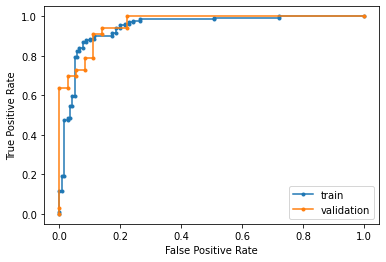

In [ ]:
print('ROC CURVE')
train_probs = reg.predict_proba(X_train)
train_probs1 = train_probs[:, 1]
fpr0, tpr0, thresholds0 = roc_curve(Y_train, train_probs1)

test_probs = reg.predict_proba(X_test)
test_probs1 = test_probs[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(Y_test, test_probs1)

plt.plot(fpr0, tpr0, marker='.', label='train')
plt.plot(fpr1, tpr1, marker='.', label='validation')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
# Bar Graph for the models


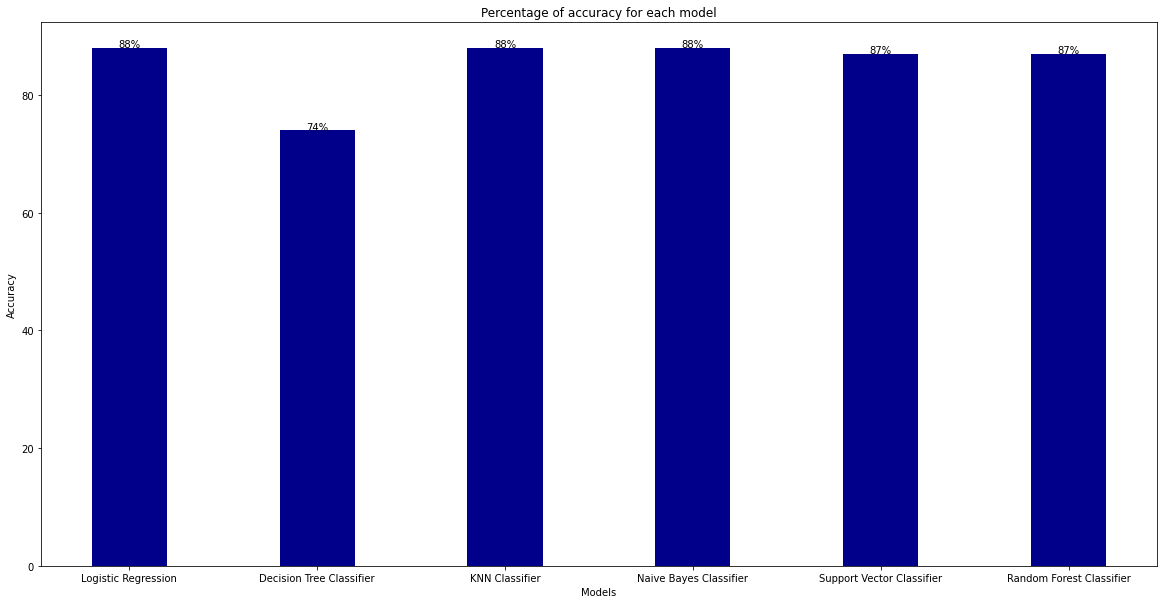

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
  
# creating the dataset
data = {'Logistic Regression':88,'Decision Tree Classifier':74, 'KNN Classifier':88,
        'Naive Bayes Classifier':88,'Support Vector Classifier':87,'Random Forest Classifier':87}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (20,10))
 
# creating the bar plot
pps = plt.bar(courses, values, color ='darkblue',width = 0.4)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Percentage of accuracy for each model")
for p in pps:
   height = p.get_height()
   plt.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center')
plt.show()